In [2]:
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
import geopandas as gpd
import folium

print("numpy version:", np.__version__)
print("scipy version:", scipy.__version__)
print("pandas version:", pd.__version__)
print("seaborn version:", sns.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("openpyxl version:", openpyxl.__version__)
print("geopandas version:", gpd.__version__)
print("folium version:", folium.__version__)


/Users/anniebodyelse/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


numpy version: 1.24.4
scipy version: 1.10.1
pandas version: 2.0.3
seaborn version: 0.13.2
matplotlib version: 3.7.5
openpyxl version: 3.1.2
geopandas version: 0.13.2
folium version: 0.16.0


In [3]:
import pandas as pd

data = pd.read_excel('/Users/anniebodyelse/Desktop/untitled folder/Green.xlsx')


In [4]:
# Display basic information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Program      32 non-null     object 
 1   Year         32 non-null     int64  
 2   Period       32 non-null     object 
 3   Week Ending  0 non-null      float64
 4   Geo Level    32 non-null     object 
 5   State        32 non-null     object 
 6   State ANSI   32 non-null     int64  
 7   Commodity    32 non-null     object 
 8   Data Item    32 non-null     object 
 9   Domain       32 non-null     object 
 10  Value        32 non-null     int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 2.9+ KB


In [5]:
# Check for missing values
missing_values = data.isnull().sum()

In [6]:

data_cleaned = data.dropna(subset=['Value'])  # Assuming 'Value' is crucial for analysis

# Convert 'Value' to numeric
data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'], errors='coerce')



In [7]:
# Basic summary statistics
summary_stats = data_cleaned.describe()



In [8]:
print("\nSummary Statistics:\n", summary_stats)


Summary Statistics:
          Year  Week Ending  State ANSI         Value
count    32.0          0.0   32.000000  3.200000e+01
mean   2023.0          NaN   27.000000  8.705028e+07
std       0.0          NaN   18.141025  1.731389e+08
min    2023.0          NaN    4.000000  3.764000e+06
25%    2023.0          NaN   12.000000  2.403975e+07
50%    2023.0          NaN   26.000000  3.403800e+07
75%    2023.0          NaN   41.250000  6.675150e+07
max    2023.0          NaN   55.000000  9.416610e+08


In [9]:
# Total production value by state
total_value_by_state = data_cleaned.groupby('State')['Value'].sum().sort_values(ascending=False)
total_value_by_state

State
CALIFORNIA        1664239000
FLORIDA            302931000
ARIZONA            205606000
WISCONSIN          148393000
GEORGIA            104731000
MICHIGAN           102654000
NEW YORK            71690000
TEXAS               47707000
WASHINGTON          39130000
MINNESOTA           37949000
NORTH CAROLINA      24536000
OREGON              19321000
PENNSYLVANIA        10097000
ILLINOIS             6625000
Name: Value, dtype: int64

In [10]:
# Total production value by commodity
total_value_by_commodity = data_cleaned.groupby('Commodity')['Value'].sum().sort_values(ascending=False)
total_value_by_commodity

Commodity
BROCCOLI     1070211000
CABBAGE       597600000
CELERY        362548000
BEANS         362426000
CUCUMBERS     289627000
PEAS          103197000
Name: Value, dtype: int64

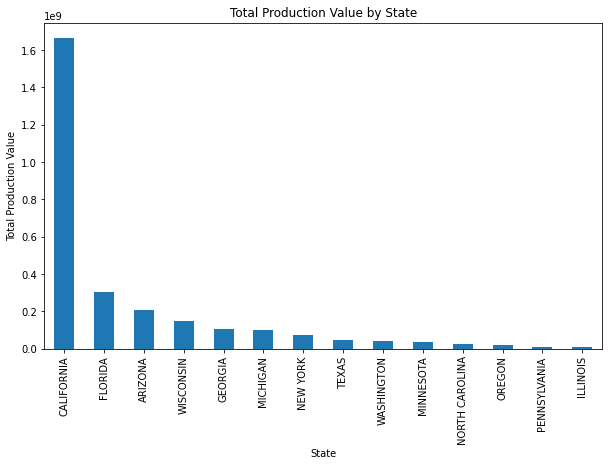

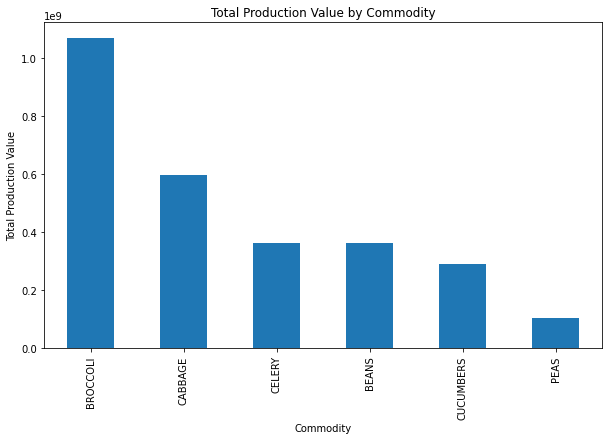

In [11]:
import matplotlib.pyplot as plt

# Bar chart for total production value by state
plt.figure(figsize=(10, 6))
total_value_by_state.plot(kind='bar')
plt.title('Total Production Value by State')
plt.xlabel('State')
plt.ylabel('Total Production Value')
plt.show()

# Bar chart for total production value by commodity
plt.figure(figsize=(10, 6))
total_value_by_commodity.plot(kind='bar')
plt.title('Total Production Value by Commodity')
plt.xlabel('Commodity')
plt.ylabel('Total Production Value')
plt.show()

In [12]:
# Top 5 states by production value
top_states = total_value_by_state.head(5)
top_states



State
CALIFORNIA    1664239000
FLORIDA        302931000
ARIZONA        205606000
WISCONSIN      148393000
GEORGIA        104731000
Name: Value, dtype: int64

In [13]:
# Top 5 commodities by production value
top_commodities = total_value_by_commodity.head(5)
top_commodities

Commodity
BROCCOLI     1070211000
CABBAGE       597600000
CELERY        362548000
BEANS         362426000
CUCUMBERS     289627000
Name: Value, dtype: int64

<ipython-input-14-33796792396c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Value'], bins=20, kde=True)


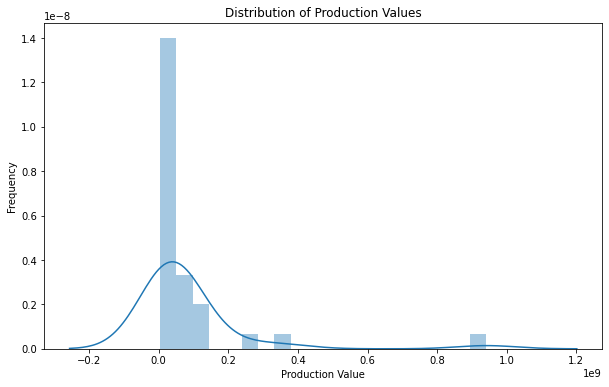

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for production values
plt.figure(figsize=(10, 6))
sns.distplot(data_cleaned['Value'], bins=20, kde=True)
plt.title('Distribution of Production Values')
plt.xlabel('Production Value')
plt.ylabel('Frequency')
plt.show()


In [16]:
# Select only numeric columns
numeric_columns = data_cleaned.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)


             Year  Week Ending  State ANSI     Value
Year          NaN          NaN         NaN       NaN
Week Ending   NaN          NaN         NaN       NaN
State ANSI    NaN          NaN    1.000000 -0.394073
Value         NaN          NaN   -0.394073  1.000000
